In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def getfile(f, **kwargs):
  loc = 'https://drive.google.com/uc?export=download&id='+f.split('/')[-2]
  out = pd.read_pickle(loc, **kwargs)
  return out

f = "https://drive.google.com/file/d/1pltF9KHbAy4UPCin6W_qI317A6-xaCdT/view?usp=drive_link"
csv_data = getfile(f)
print(csv_data.head())

    Area Name Area Type  Year     Month Date_Numeric Seasonally Adjusted(Y/N)  \
0  California     State  1976   January   1976-01-01                        N   
1  California     State  1976   January   1976-01-01                        Y   
2  California     State  1976  February   1976-02-01                        N   
3  California     State  1976  February   1976-02-01                        Y   
4  California     State  1976     March   1976-03-01                        N   

  Status  Labor Force  Employment  Unemployment  Unemployment Rate  Benchmark  
0  Final      9672362     8668016       1004346               10.4       2020  
1  Final      9774280     8875685        898595                9.2       2020  
2  Final      9684440     8704564        979876               10.1       2020  
3  Final      9768885     8871553        897332                9.2       2020  
4  Final      9689626     8776344        913282                9.4       2020  


**Descriptive Statistics**

*   Mean
*   Std
*   Median, Mode
*   Min/Max


# **Descriptive Statistics**:
We start by calculating the descriptive statistics for key columns like Labor Force, Employment, Unemployment, and Unemployment Rate. This will give us a quick overview of the dataset's central tendency, spread, and range.


In [4]:
print(csv_data[['Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate']].describe())

        Labor Force    Employment  Unemployment  Unemployment Rate
count  2.040960e+05  2.040960e+05  2.040960e+05      204096.000000
mean   2.102602e+05  1.953237e+05  1.493632e+04           8.404918
std    1.326755e+06  1.233549e+06  9.907719e+04           7.361708
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000
25%    1.500000e+03  1.300000e+03  1.000000e+02           4.000000
50%    7.600000e+03  7.000000e+03  5.000000e+02           6.600000
75%    3.560000e+04  3.340000e+04  2.400000e+03          10.800000
max    1.970080e+07  1.884210e+07  3.015300e+06         100.000000


# **Yearly Analysis of Unemployment Rate**:
To understand how unemployment rates have changed over time, we calculate the average unemployment rate for each year. This will help us identify any long-term trends or cyclical patterns in the data.

In [5]:
yearly_stats = csv_data.groupby('Year')['Unemployment Rate'].mean()
print(yearly_stats)

Year
1976     8.943056
1977     8.163889
1978     6.927778
1979     5.794444
1980     6.648611
1981     7.165278
1982     9.631944
1983     9.731944
1984     7.766667
1985     7.108333
1986     6.693056
1987     5.854167
1988     5.177778
1989     5.281944
1990     8.094048
1991    10.181868
1992    11.896703
1993    11.897894
1994    10.858883
1995    10.440110
1996     9.874542
1997     9.015934
1998     8.589011
1999     7.480495
2000     6.157509
2001     6.648810
2002     7.737271
2003     8.027106
2004     7.487454
2005     6.696612
2006     6.161996
2007     6.614744
2008     8.563736
2009    12.824451
2010    13.638957
2011    13.120809
2012    11.827661
2013    10.258252
2014     8.785848
2015     7.543408
2016     6.967399
2017     6.188713
2018     5.465910
2019     5.347982
2020    10.479508
2021     7.906478
2022     5.189307
2023     5.860596
2024     6.472754
Name: Unemployment Rate, dtype: float64


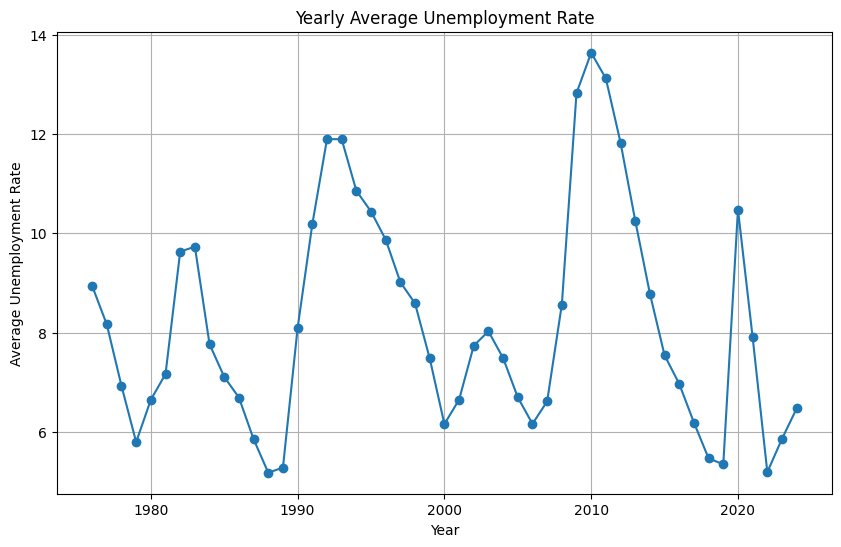

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats.index, yearly_stats.values, marker='o', linestyle='-')
plt.title('Yearly Average Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate')
plt.grid(True)
plt.show()

# **Seasonally Adjusted vs. Unadjusted Data:**
The dataset includes both seasonally adjusted and unadjusted data, which could affect the analysis. We separate the seasonally adjusted data from the unadjusted data and compare their average unemployment rates to see if there are significant differences.

In [ ]:
# Separate seasonally adjusted and unadjusted data
adjusted_stats = csv_data[csv_data['Seasonally Adjusted(Y/N)'] == 'Y']
unadjusted_stats = csv_data[csv_data['Seasonally Adjusted(Y/N)'] == 'N']

# Calculate and print the mean unemployment rate for both adjusted and unadjusted data
print("Seasonally Adjusted Mean Unemployment Rate:", adjusted_stats['Unemployment Rate'].mean())
print("Unadjusted Mean Unemployment Rate:", unadjusted_stats['Unemployment Rate'].mean())


Seasonally Adjusted Mean Unemployment Rate: 7.3014245014245
Unadjusted Mean Unemployment Rate: 8.414489401554802


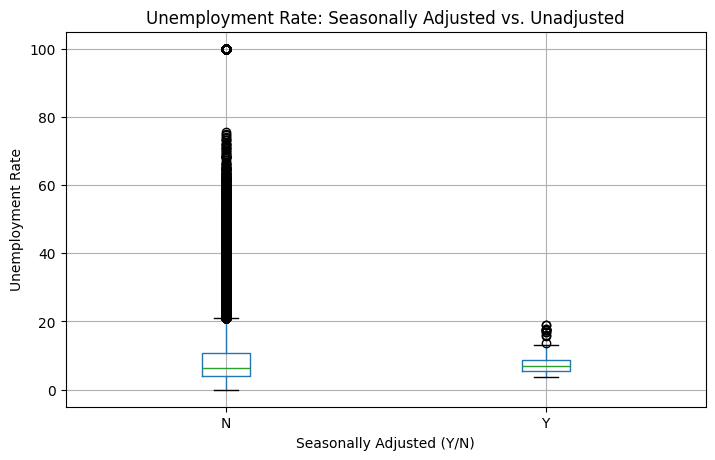

In [ ]:
csv_data.boxplot(column='Unemployment Rate', by='Seasonally Adjusted(Y/N)', figsize=(8, 5))
plt.title('Unemployment Rate: Seasonally Adjusted vs. Unadjusted')
plt.suptitle('')
plt.xlabel('Seasonally Adjusted (Y/N)')
plt.ylabel('Unemployment Rate')
plt.show()

# Bias in Labels (Area Type)
To check for potential bias, we look at the distribution of the Area Type column. If one area type is overrepresented, it may introduce bias in the model and affect generalizability.

In [ ]:
print(csv_data['Area Type'].value_counts(normalize=True))

Area Type
Sub-County Place     0.809134
County               0.122192
Metropolitan Area    0.062941
State                0.005733
Name: proportion, dtype: float64


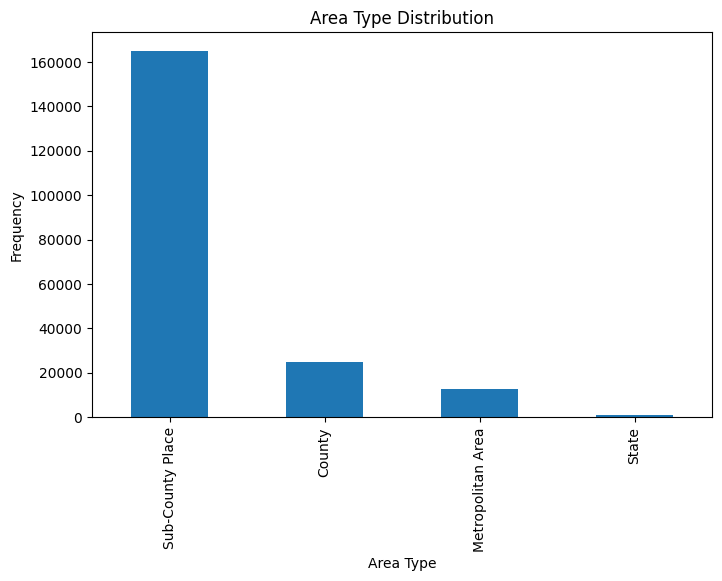

In [ ]:
area_type_counts = csv_data['Area Type'].value_counts()
area_type_counts.plot(kind='bar', figsize=(8, 5), title="Area Type Distribution")
plt.xlabel('Area Type')
plt.ylabel('Frequency')
plt.show()

# **Data Imbalance in Unemployment Rate:**
Here, we analyze the distribution of unemployment rates to see if they are concentrated within a specific range. This check will help us understand if there is any imbalance that might affect model performance.

In [ ]:
print(csv_data['Unemployment Rate'].value_counts(bins=5))

(-0.101, 20.0]    192306
(20.0, 40.0]       10651
(40.0, 60.0]         856
(80.0, 100.0]        177
(60.0, 80.0]         106
Name: count, dtype: int64


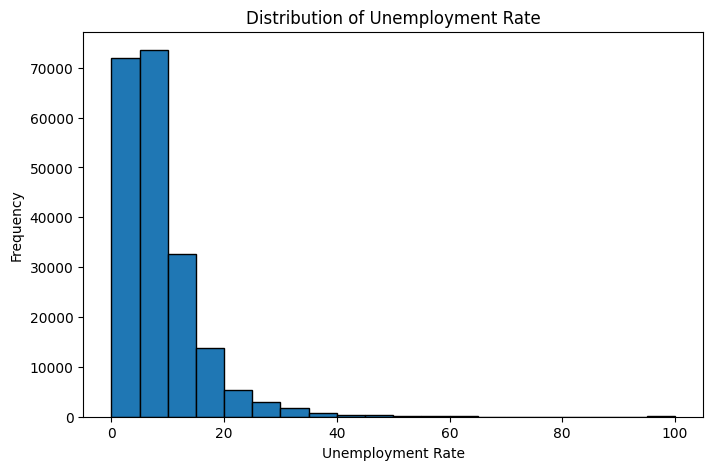

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(csv_data['Unemployment Rate'], bins=20, edgecolor='black')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

# Missing Values Analysis
To ensure data completeness, we check for missing values across all columns. Identifying missing values allows us to take appropriate action to handle them, such as filling or removing the affected rows/columns.

In [ ]:
print(csv_data.isnull().sum())

Area Name                   0
Area Type                   0
Year                        0
Month                       0
Date_Numeric                0
Seasonally Adjusted(Y/N)    0
Status                      0
Labor Force                 0
Employment                  0
Unemployment                0
Unemployment Rate           0
Benchmark                   0
dtype: int64


# Sparse Data Identification
Columns with a high percentage of missing values can lead to sparsity issues. Here, we identify any columns where the missing value rate exceeds a defined threshold, which will help us decide if these columns should be filled or removed.

In [ ]:
sparsity_threshold = 0.8
sparse_columns = [col for col in csv_data.columns if csv_data[col].isnull().mean() > sparsity_threshold]
print("Sparse columns:", sparse_columns)

Sparse columns: []
